In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Salries.csv')

In [3]:
df = data.copy(deep=True)

In [9]:
df.sample(5)

,rank,discipline,phd,service,sex,salary
53,AsstProf,A,5,3,Female,73500
13,Prof,B,35,33,Male,162200
72,Prof,B,24,15,Female,161101
31,Prof,B,22,21,Male,155750
9,Prof,A,51,51,Male,57800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [11]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


In [12]:
df.isna().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [13]:
df.isnull().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [24]:
df = df.drop_duplicates()

In [28]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

<Axes: xlabel='rank', ylabel='count'>

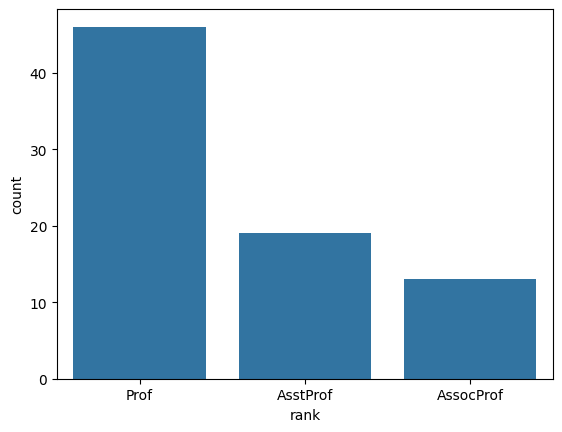

In [32]:
sns.barplot(data=df['rank'].value_counts())

<Axes: xlabel='rank', ylabel='count'>

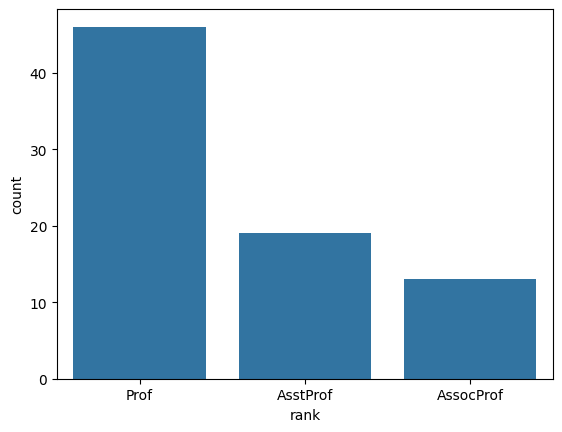

In [38]:
sns.barplot(data=df['rank'].value_counts())

<Axes: xlabel='rank', ylabel='salary'>

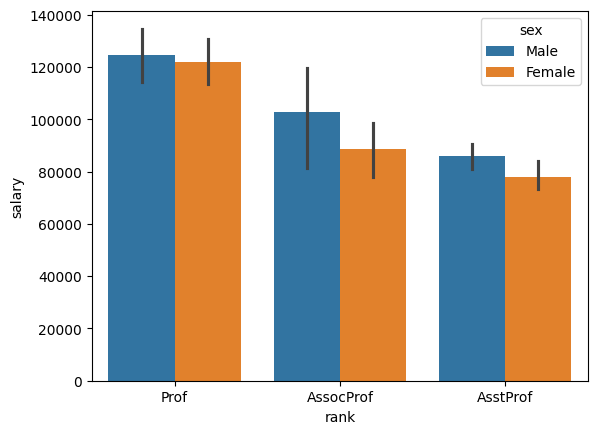

In [41]:
sns.barplot(data=df,x=df['rank'],y=df['salary'],hue=df['sex'])

<Axes: xlabel='discipline', ylabel='salary'>

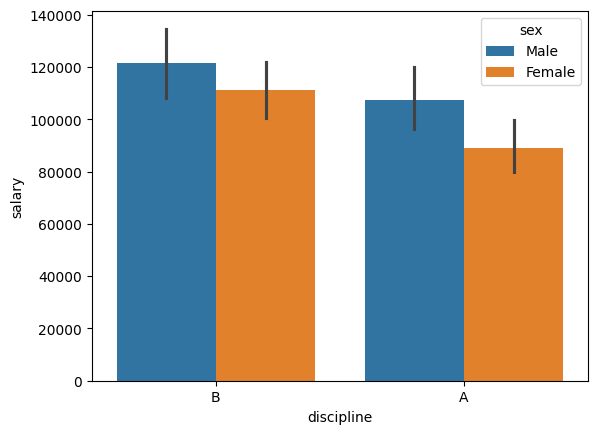

In [43]:
sns.barplot(data=df,x=df['discipline'],y=df['salary'],hue=df['sex'])

In [44]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

<Axes: ylabel='sex'>

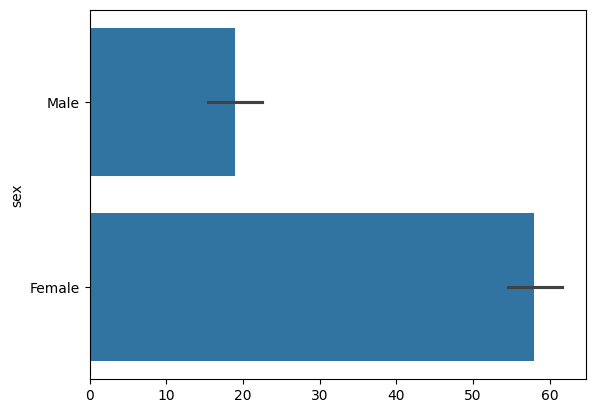

In [50]:
sns.barplot(df['sex'])